In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
df = pd.read_csv('Reviews.csv.zip')

TODO:

2. Nick- Remove 'Summary' column, add single row- of no NAN's in all the df.

3. Check for duplicates- and remove them.Logic for reduction: The same product id and review and user id TODO: Nick - duplicates

5. Add Confusion matrix - TODO: Nick

13. Create the PDF for submission TODO: Nick (edited) 

### EDA

In [3]:
df.shape

(568454, 10)

In [4]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [6]:
review_counts = df.Text.value_counts()
duplicate_reviews = review_counts[review_counts > 1]
len(duplicate_reviews)

58040

We have 58,040 duplicate reviews. Let's see if they have the same User Id.

In [7]:
reviews_with_same_userIds = df[df.duplicated(subset=['Text', 'ProductId', 'UserId'], keep=False)]
len(reviews_with_same_userIds)

2122

Out of the 58,040 duplicates, 2,122 have the same User Id. Let's remove the duplicates after the first from the dataset

In [8]:
df = df.drop_duplicates(subset=['Text', 'ProductId', 'UserId'], keep='first')
df.shape

(567145, 10)

Let's also review how many of the duplicate reviews are over 100 words

In [9]:
review_counts = df.Text.value_counts()
duplicate_reviews = review_counts[review_counts > 1]
duplicate_reviews = pd.Series(duplicate_reviews.index)
duplicates_with_over_100_words = duplicate_reviews.apply(lambda x: len(x.split()) > 100)
duplicates_with_over_100_words.sum()

14188

Out of the 58,002 remaning duplicates, 14,188 of the reviews have over 100 words

In [10]:
df = df.loc[:,['ProductId','Text','Score']]

In [11]:
df.shape

(567145, 3)

In [12]:
df.isnull().sum()

ProductId    0
Text         0
Score        0
dtype: int64

There are no missing values

In [13]:
df.head(5)

,ProductId,Text,Score
0,B001E4KFG0,I have bought several of the Vitality canned d...,5
1,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...,1
2,B000LQOCH0,This is a confection that has been around a fe...,4
3,B000UA0QIQ,If you are looking for the secret ingredient i...,2
4,B006K2ZZ7K,Great taffy at a great price. There was a wid...,5


In [14]:
df.sort_values('ProductId')

,ProductId,Text,Score
150513,0006641040,It's a great book with adorable illustrations....,5
150512,0006641040,I remembered this book from my childhood and g...,5
150514,0006641040,This book is a family favorite and was read to...,5
150515,0006641040,"The same author wrote ""Where the Wild Things A...",5
150516,0006641040,"Classic children's book, can't go wrong. I rea...",5
...,...,...,...
191720,B009UOFTUI,"This coffee supposedly is premium, it tastes w...",1
1477,B009UOFU20,"This coffee supposedly is premium, it tastes w...",1
328481,B009UUS05I,The basket was the perfect sympathy gift when ...,5
5702,B009WSNWC4,Purchased this product at a local store in NY ...,5


In [15]:
index_unique_prod = np.where(df.ProductId.value_counts().values == 1)[0].shape[0]

In [16]:
df.shape[0] - index_unique_prod

536729

We have 538046 products that has at least 2 reviews on the dataset.

In [17]:
np.where(df.ProductId.value_counts().values > 5)[0].shape[0]

17304

We have 17310 products on our dataset with more than 5 reviews.

In [18]:
np.where(df.ProductId.value_counts().values > 10)[0].shape[0]

9617

We have 9618 products on our dataset with more than 10 reviews.

In [19]:
np.where(df.ProductId.value_counts().values > 100)[0].shape[0]

843

We have 862 products on our dataset with more than 100 reviews.

In [20]:


nbr_reviews = [np.where(df.ProductId.value_counts().values > k)[0].shape[0] for k in range(10,1000,20)]


(0.0, 5000.0)

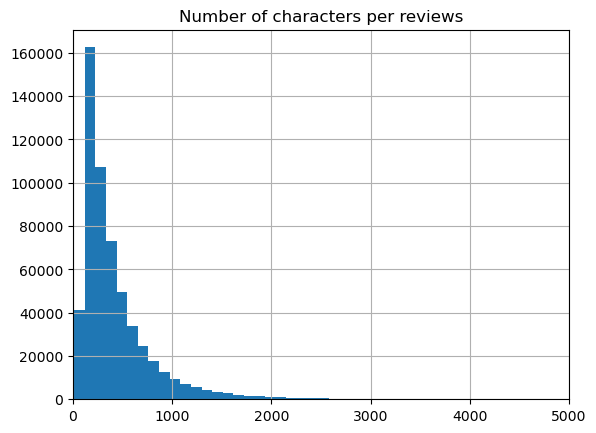

In [21]:
df.Text.str.len().hist(bins = 200)
plt.title('Number of characters per reviews')
plt.xlim(0,5000)

We can see that most of our reviews has less than 1000 characters. The majority of them has between 100 and 200 characters.

(0.0, 1000.0)

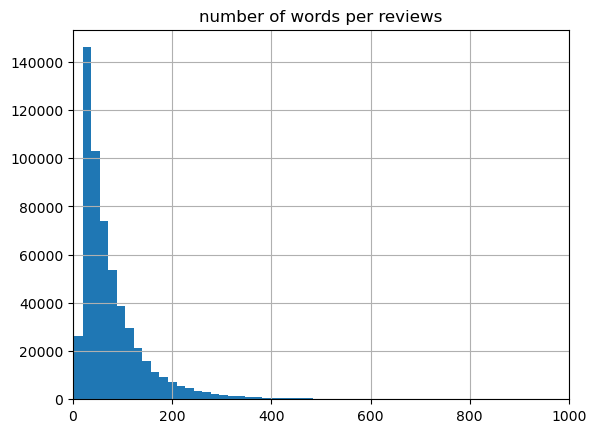

In [22]:
df.Text.str.split().map(lambda x : len(x)).hist(bins = 200)
plt.title('number of words per reviews')
plt.xlim(0,1000)

We can see that most of our reviews have less than 200 words. Most of them have around 40 words.

Text(0.5, 1.0, 'Average len of words per reviews')

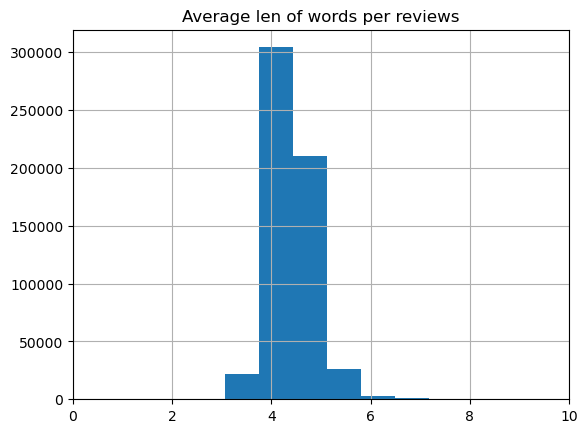

In [23]:
df.Text.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x : np.mean(x)).hist(bins = 50)
plt.xlim(0,10)
plt.title('Average len of words per reviews')

We see that most of the reviews have a length of words between 3 and 6. This can be explained by the 'stop words' which are reducing the mean.

In [24]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/nick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
from collections import defaultdict
new = df.Text.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i] # we get a list with all the words of all the reviews

dic = defaultdict(int)
for word in corpus:
  if word in stop:
    dic[word] +=1
    

<BarContainer object of 20 artists>

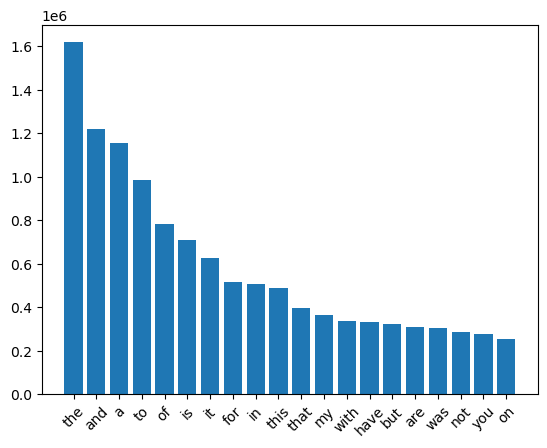

In [26]:
top = sorted(dic.items(), key = lambda x : x[1], reverse = True)[:20]
x,y = zip(*top)
plt.xticks(rotation = 45)
plt.bar(x,y)

We see how often are appearing stop words such as 'the','and',...

<Axes: >

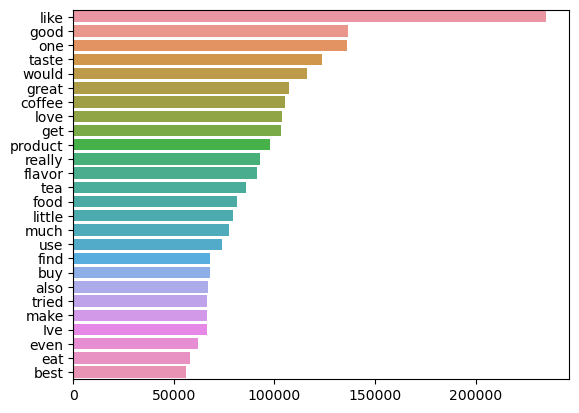

In [27]:
from collections import Counter
import re
counter = Counter(corpus)
most = counter.most_common()
x,y = [],[]
for word,count in most[:100]:
  if word.lower() not in stop :
    clean_word = re.sub(r'[^\w\s]', '', word)
    if clean_word and len(clean_word) > 2:
      x.append(clean_word)
      y.append(count)

sns.barplot(x=y, y=x)

We see that we have a lot of positive words due to the fact that our dataset is imbalanced with a lot of good review with Words like 'good','great','love'.

In [28]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:15]

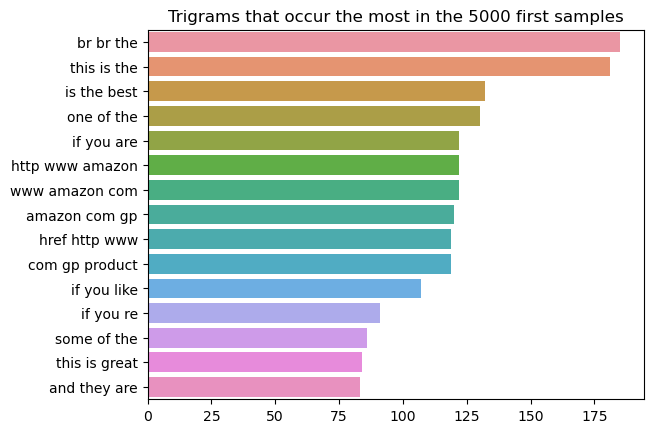

In [29]:
top_trigrams = get_top_ngram(df.Text.iloc[:5000], 3)
x,y = map(list,zip(*top_trigrams))
sns.barplot(x = y, y = x)
plt.title('Trigrams that occur the most in the 5000 first samples')
plt.show()

We see that we have a lot of reference to amazon and maybe the link of the product. We will see later why. We also have a lof of positive reviews patterns such as 'if you like', 'is the best', 'this is great'. We will have to do some data cleaning.

We split our data to train, validation and test using a groupshuffle to keep the same products on the same set.

In [30]:
from sklearn.model_selection import GroupShuffleSplit
splitter_temp = GroupShuffleSplit(test_size=.40, n_splits=1, random_state = 42)
split_temp = splitter_temp.split(df, groups=df['ProductId'])
train_inds, temp_inds = next(split_temp)

train = df.iloc[train_inds]
temp = df.iloc[temp_inds]



In [31]:
splitter_val = GroupShuffleSplit(test_size=.50, n_splits=1, random_state = 42)
split_val = splitter_val.split(temp, groups=temp['ProductId'])
val_inds, test_inds = next(split_val)

val = temp.iloc[val_inds]
test = temp.iloc[test_inds]

In [32]:
train.shape,val.shape,test.shape

((333029, 3), (115658, 3), (118458, 3))

In [33]:
X_train = train.drop(columns = 'Score')
y_train = train.Score

X_val = val.drop(columns = 'Score')
y_val = val.Score

X_test = test.drop(columns = 'Score')
y_test = test.Score

Name entity recognition :

In [51]:
!python -m spacy download en_core_web_sm

zsh:1: command not found: python


In [35]:
import spacy
nlp = spacy.load('en_core_web_sm')

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [36]:
processed_reviews = []
for review in tqdm(X_train.Text[:10], desc = 'preprocessing'):
  doc = nlp(review)
  processed_reviews.append(doc)

NameError: name 'tqdm' is not defined

In [37]:
for process_review in processed_reviews:
  print([(x.text,x.label_) for x in process_review.ents])


In [38]:
from spacy import displacy
for process_review in processed_reviews:
  displacy.render(process_review,style = 'ent')

In [39]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents] # we just keep the labels

ent=X_train.Text[:100].apply(lambda x : ner(x)) # for each rows we get a list of labels
ent=[x for sub in ent for x in sub] # we get a single list with all the labels of all the rows

counter=Counter(ent)
count=counter.most_common()

NameError: name 'nlp' is not defined

In [40]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)
plt.title('Occurences of labels in the first 100 rows of X_train')
plt.show()

TypeError: zip() argument after * must be an iterable, not int

In [ ]:
! pip install contractions

#### Preprocessing

In [41]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import contractions
import string
nltk.download('punkt')
nltk.download('wordnet')
words_to_discard = ['amazon','like','would','product','get']
def preprocess_news(df):
    corpus=[]
    lem=WordNetLemmatizer()
    for news in tqdm(df.Text, desc = 'preprocessing'):
      news = contractions.fix(news)
      clean_words = []
      for w in word_tokenize(news):
        if (w.lower() not in stop and len(w)> 2):
          no_punct = [char for char in w if char not in string.punctuation and not char.isdigit()]
          words_wo_punct = ''.join(no_punct).lower()
          if words_wo_punct and len(words_wo_punct) > 2 and words_wo_punct not in words_to_discard:
            clean_words.append(words_wo_punct)

      #words=[lem.lemmatize(w.lower()) for w in word_tokenize(news) if (w.lower() not in stop and len(w) > 2)]
      # word_tokenize() split the text into individual words
      # lemmatize : reduce each word into a common base (cats -> cat) based on the dictionary form
      corpus.append(clean_words)
    return corpus

[nltk_data] Downloading package punkt to /Users/nick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/nick/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
corpus = preprocess_news(X_train[:50000]) # we get a list of each words preprocessed of each reviews

preprocessing: 100%|████████████████████| 50000/50000 [00:35<00:00, 1390.22it/s]


In [43]:
import gensim
dic=gensim.corpora.Dictionary(corpus) # assign an id to each unique word of corpus
bow_corpus = [dic.doc2bow(doc) for doc in corpus] # we create a bag of words. We have a list of tuples for each row with (ID of the word, occurences of the word)

In [44]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 5,
                                   id2word = dic,
                                   passes = 5,
                                   workers = 2) # We use LDAMulticore as we have a large dataset ( it parallelizes the process)
# LDA models are used to get the main topics of our data.
# For each topic, we get the top words and the probability for this word to appear in the given topic
# based on all the possible words of this topic
lda_model.show_topics()

[(0,
  '0.019*"taste" + 0.014*"flavor" + 0.012*"chocolate" + 0.010*"good" + 0.010*"drink" + 0.009*"sugar" + 0.009*"sweet" + 0.008*"one" + 0.007*"really" + 0.006*"water"'),
 (1,
  '0.045*"coffee" + 0.042*"tea" + 0.013*"cup" + 0.011*"good" + 0.011*"flavor" + 0.009*"one" + 0.009*"green" + 0.009*"great" + 0.009*"taste" + 0.007*"strong"'),
 (2,
  '0.018*"food" + 0.017*"dog" + 0.010*"one" + 0.008*"loves" + 0.008*"treats" + 0.008*"dogs" + 0.006*"eat" + 0.006*"treat" + 0.006*"good" + 0.005*"cat"'),
 (3,
  '0.011*"price" + 0.008*"one" + 0.008*"bag" + 0.008*"great" + 0.008*"order" + 0.007*"buy" + 0.007*"good" + 0.007*"box" + 0.006*"time" + 0.006*"store"'),
 (4,
  '0.012*"good" + 0.012*"great" + 0.009*"taste" + 0.008*"flavor" + 0.007*"love" + 0.006*"make" + 0.006*"use" + 0.005*"one" + 0.005*"eat" + 0.005*"salt"')]

We get 5 main topics :
-  one seems to be about dog food
-  one seams to be about tea and drinks
-  one seems to be about food with chocolate
-  one seems to be about coffee with a chocolate flavor maybe
- one seems to be about snackfood such as chips

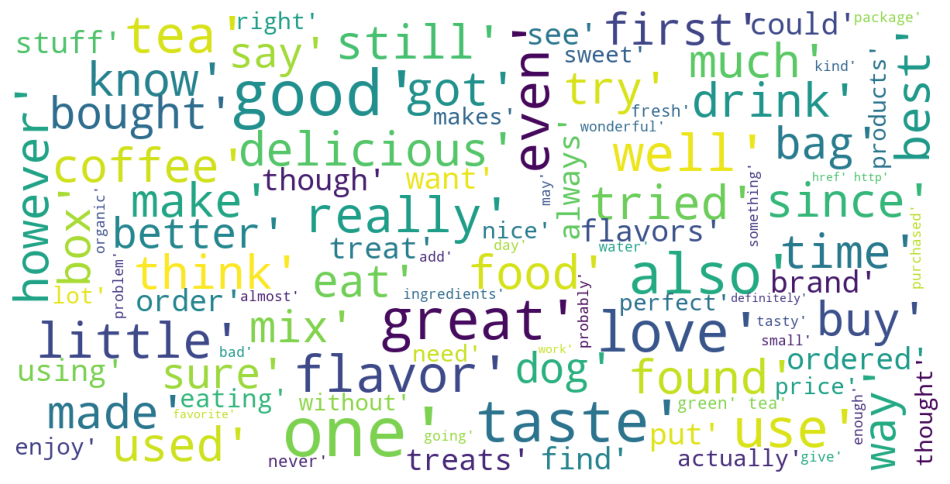

In [45]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

We see that many positive words are very frequent in the dataset such as 'delicious', 'love', 'good',...
we also have many words from fooding products such as 'flavor','taste','ingredients',...

In [46]:
y_corpus = y_train[:50000]

In [47]:
from scipy.sparse import csr_matrix
from sklearn.linear_model import LinearRegression



rows, cols, data = [], [], []
for i, document in enumerate(bow_corpus):
    for word_index, word_count in document:
        rows.append(i)
        cols.append(word_index)
        data.append(word_count)

# Create a sparse matrix
num_docs = len(bow_corpus)
num_words = len(set(cols))
X_sparse = csr_matrix((data, (rows, cols)), shape=(num_docs, num_words))
# it creates a matrix where features are each words and each rows corresponds to a review


#### Model

We use a logisticregression for our baseline model.

In [48]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_sparse, y_corpus, test_size=0.2, random_state=42)

# Choose a model (e.g., Linear Regression)
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.64      0.56      0.60       968
           2       0.33      0.26      0.29       569
           3       0.32      0.25      0.28       775
           4       0.37      0.28      0.32      1423
           5       0.80      0.89      0.84      6265

    accuracy                           0.69     10000
   macro avg       0.49      0.45      0.47     10000
weighted avg       0.66      0.69      0.67     10000



/Users/nick/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We get an accuracy of 0.69 for our baseline model.
Precisions and recalls of each labels are very poor except the label 5 as it is the predominant one of our dataset.

In [49]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score

# Show confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix[0]}\n{conf_matrix[1]}\n")

Confusion Matrix:
[544 112  50  46 216]
[126 147 107  61 128]

